# Description
This is a file that contains a set of some machine learning models used to predict customer churn in an insurance dataset.

In [0]:
# Code to read file into Colaboratory:
#!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import seaborn as sns #visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import random
import xlrd
import plotly.offline as py #visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from datetime import datetime

In [0]:
# import the metrics class
from sklearn import metrics

# Upload data

In [6]:
#drive link for the file I want to upload 
# For cancellation data
link='https://drive.google.com/open?id=1nIFX9MDqDKKGs_mpphhhF0wSVzl5u7Sp'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
#upload a file using its name
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('data_encode.csv')  
data_df = pd.read_csv('data_encode.csv')


1nIFX9MDqDKKGs_mpphhhF0wSVzl5u7Sp


In [7]:
data_df.head()

,ASSURE,LIBECATE,ACTIVITE,QUALITE,BUREAU,churn,claims_state_Claims_filed,claims_state_Claims_not_filed,claims_state_Claims_partially_filed,claims_state_No_claims,duration_group_month_duration_0-1,duration_group_month_duration_1-3,duration_group_month_duration_3-6,duration_group_month_duration_6-12,duration_group_month_duration_gt_12,beginyear_policy,endyear_policy,beginmonth_policy,endmonth_policy,PRIMTOTA
0,42369,27,62,0,9,1,1,0,0,0,0,1,0,0,0,0.073684,0.000000,0.000000,0.181818,0.250873
1,7857,27,62,0,21,1,1,0,0,0,0,1,0,0,0,0.073684,0.000000,0.000000,0.181818,0.250904
2,8895,27,5,0,24,1,1,0,0,0,0,0,0,1,0,0.073684,0.011236,0.090909,0.090909,0.250877
3,38391,55,62,0,21,1,0,0,0,1,0,1,0,0,0,0.073684,0.000000,0.090909,0.272727,0.250897
4,36492,34,66,0,35,1,1,0,0,0,0,0,1,0,0,0.073684,0.000000,0.090909,0.545455,0.250798


In [8]:
data_df.shape

(86633, 20)

# Model building

In [0]:
#customer col
Id_col  = ['ASSURE']
#Target columns
target_col = ["churn"]
#Retrieve feature columns
feature_cols   = [x for x in data_df.columns if x not in  target_col + Id_col]
X = data_df[feature_cols] # Features
y = data_df[target_col] 

In [0]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

usefull functions

## Logistic regression

### Model prediction

In [11]:
# Model prediction
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(penalty='l2', C=25, verbose=True)
# fit the model with data
%time
logreg.fit(X_train,y_train)
y_pred_lr=logreg.predict(X_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished


In [12]:
logreg.tol

0.0001

###  confusion matrix for LR

Text(0.5, 257.44, 'Predicted label')

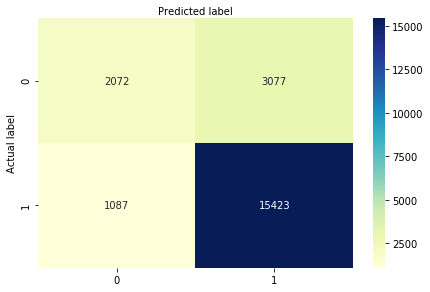

In [23]:

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
#cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
#plt.title('Confusion matrix - LR', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
from sklearn.metrics import plot_confusion_matrix

Confusion matrix, without normalization
[[ 2072  3077]
 [ 1087 15423]]
Normalized confusion matrix
[[0.40240823 0.59759177]
 [0.06583889 0.93416111]]


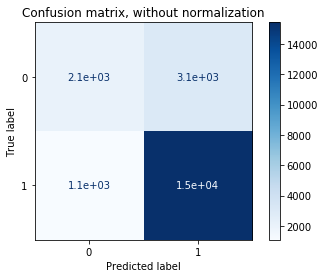

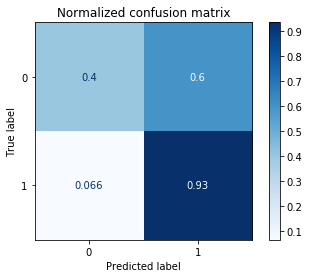

In [25]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logreg, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))
print("Precision:",metrics.precision_score(y_test, y_pred_lr))
print("Recall:",metrics.recall_score(y_test, y_pred_lr))


Accuracy: 0.9765455468858212
Precision: 0.9942550037064493
Recall: 0.9748637189582071


### ROC Curve for LR

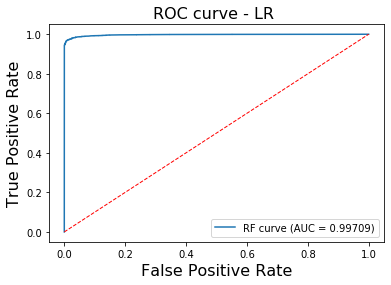

In [0]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='{} curve (AUC = {:0.5f})'.format('RF',auc))
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve - LR ', fontsize=16)
plt.legend(loc=4)
plt.show()

Text(0, 0.5, 'Status (1:churn, 0:not-churn)')

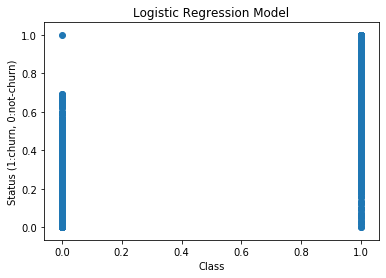

In [0]:
plt.scatter(y_test,y_pred_proba)
plt.title("Logistic Regression Model")
plt.xlabel('Class')
plt.ylabel('Status (1:churn, 0:not-churn)')

In [0]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, logreg.predict(X_train), color = "green")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

### Precision recall curve
Average precision (AP) summarizes such a plot as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight


Text(0.5, 1.0, 'Precision-Recall (LR)')

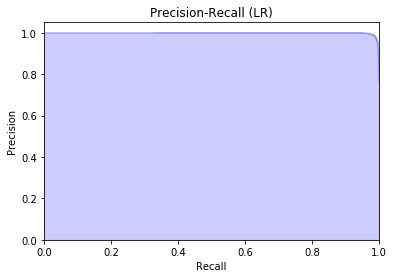

In [0]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
average_precision = average_precision_score(y_test, y_pred_proba)
#print('Average precision-recall score LR: {}'.format(average_precision))

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall (LR)')

### cross validation for LR

In [0]:
#cross valiation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=5)
print (scores)

[0.8785133  0.94967392 0.94776938 0.91931667 0.8823088 ]


In [0]:
np.mean(scores)

0.9155164150470897

## LightGBM 

### Model prediction

In [0]:
from lightgbm import LGBMClassifier
#lgbm_c = LGBMClassifier(boosting_type='gbdt',objective='binary' )
# fit the model with data
#lgbm_c.fit(X_train,y_train)
#y_pred_lgbm=lgbm_c.predict(X_test)

In [0]:
import lightgbm as lgb
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_valid = lgb.Dataset(X_test, y_test, reference=lgb_train)
# to record eval results for plotting
evals_result = {} 
# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'loss' : 'binary_crossentropy',
    'metric': {'auc', 'binary'},
    'learning_rate': 0.1
    
}

print('Start training...')

# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=200,
                valid_sets=[lgb_train, lgb_valid],
                evals_result=evals_result,
                verbose_eval=10,
                early_stopping_rounds=20)


Start training...
Training until validation scores don't improve for 20 rounds.
[10]	training's auc: 0.999826	training's binary_logloss: 0.151036	valid_1's auc: 0.999793	valid_1's binary_logloss: 0.150524
[20]	training's auc: 0.999849	training's binary_logloss: 0.0590075	valid_1's auc: 0.999782	valid_1's binary_logloss: 0.0593838
Early stopping, best iteration is:
[9]	training's auc: 0.999822	training's binary_logloss: 0.167883	valid_1's auc: 0.999794	valid_1's binary_logloss: 0.167259


Plot metrics during training...


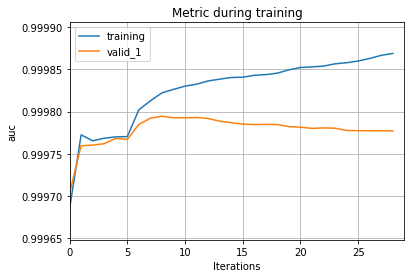

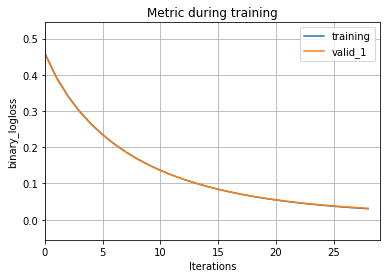

In [0]:
print('Plot metrics during training...')
ax = lgb.plot_metric(evals_result, metric='auc')
lgb.plot_metric(evals_result, metric='binary_logloss')
plt.show()

In [0]:
# predict
y_pred_lgbm = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [0]:
y_pred_lgbm = y_pred_lgbm.round()

### Confusion matrix for LGBM

Text(0.5, 257.44, 'Predicted label')

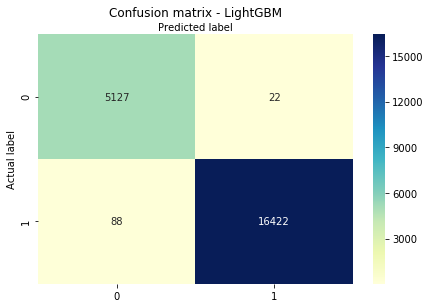

In [0]:

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_lgbm)
#cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - LightGBM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lgbm))
print("Precision:",metrics.precision_score(y_test, y_pred_lgbm))
print("Recall:",metrics.recall_score(y_test, y_pred_lgbm))

Accuracy: 0.9949212798374809
Precision: 0.9986621260034055
Recall: 0.9946698970321017


### ROC-CURVE for LGBM

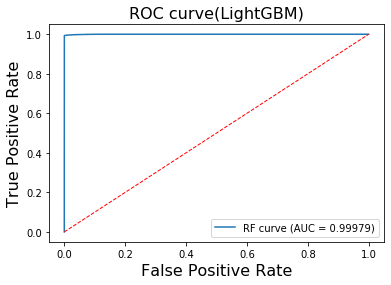

In [0]:
y_pred_proba_lgbm= gbm.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_lgbm)
auc = metrics.roc_auc_score(y_test, y_pred_proba_lgbm)
plt.plot(fpr,tpr,label='{} curve (AUC = {:0.5f})'.format('RF',auc))
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve(LightGBM)', fontsize=16)
plt.legend(loc=4)
plt.show()

### Precision recall for LGBM

Text(0.5, 1.0, '2-class PR-curve: Avg=1.00')

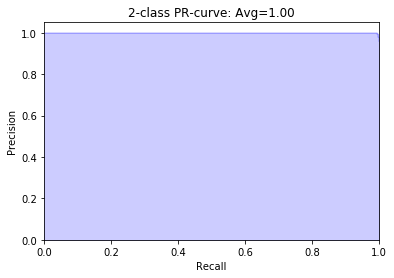

In [0]:
average_precision = average_precision_score(y_test, y_pred_proba_lgbm)
#print('Average precision-recall score LR: {}'.format(average_precision))

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_lgbm)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class PR-curve: Avg={0:0.2f}'.format(
          average_precision))

### Cross validation for LGBM

In [0]:
#cross valiation
scores = cross_val_score(gbm, X, y, scoring='accuracy', cv=4)
#print (scores)

In [0]:
np.mean(scores)

0.9155164150470897

## MLP

In [0]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'solver': ['lbfgs', 'adam'], 'max_iter': [10,20], 'alpha': 10.0 ** -np.arange(1, 5), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1]}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

clf.fit(X, y)
print(clf.score(X, y))
print(clf.best_params_)

In [0]:
5.0 ** -np.arange(1, 5)

array([0.2   , 0.04  , 0.008 , 0.0016])

### Model prediction

In [0]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', alpha=0.001, max_iter=500)
mlp.fit(X_train, y_train.values.ravel())
y_pred_mlp= mlp.predict(X_test)

In [0]:
# Is not working
from matplotlib import pyplot as plt
from sklearn import metrics
import numpy as np

def data_size_response(model,trX,teX,trY,teY,score_func,prob=True,n_subsets=20):

    train_errs,test_errs = [],[]
    subset_sizes = np.exp(np.linspace(3,np.log(trX.shape[0]),n_subsets)).astype(int)

    for m in subset_sizes:
        model.fit(trX[:m],trY[:m])
        if prob:
            train_err = score_func(trY[:m],model.predict_proba(trX[:m]))
            test_err = score_func(teY,model.predict_proba(teX))
        else:
            train_err = score_func(trY[:m],model.predict(trX[:m]))
            test_err = score_func(teY,model.predict(teX))
        print( "training error: %.3f test error: %.3f subset size: %.3f" % (train_err,test_err,m))
        train_errs.append(train_err)
        test_errs.append(test_err)

    return subset_sizes,train_errs,test_errs

def plot_response(subset_sizes,train_errs,test_errs):

    plt.plot(subset_sizes,train_errs,lw=2)
    plt.plot(subset_sizes,test_errs,lw=2)
    plt.legend(['Training Error','Test Error'])
    plt.xscale('log')
    plt.xlabel('Dataset size')
    plt.ylabel('Error')
    plt.title('Model response to dataset size')
    plt.show()

#model = # put your model here
score_func = scores
response = data_size_response(logreg,X_train,X_test,y_train,y_test,score_func,prob=True)
plot_response(*response)

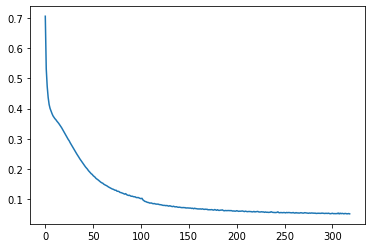

In [20]:
from scipy.special import expit
plt.plot(mlp.loss_curve_)
plt.show()

In [0]:
!pip install vpython 

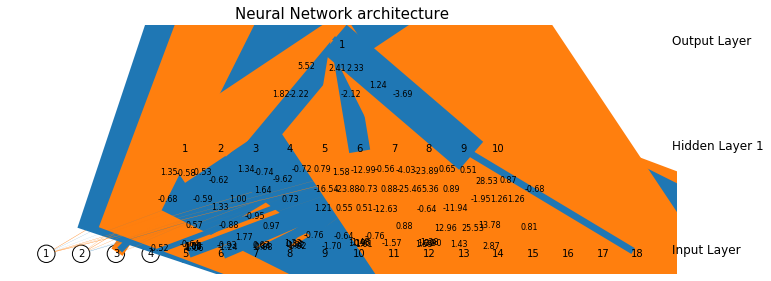

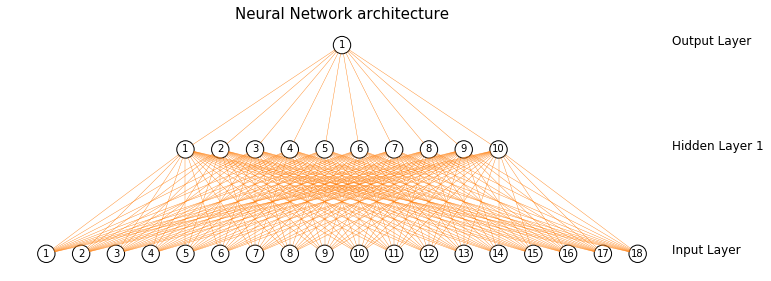

In [0]:
#import VisualizeNN as VisNN
network_structure = np.hstack(([X_train.shape[1]], np.asarray(mlp.hidden_layer_sizes), [y_train.shape[1]]))

# Draw the Neural Network with weights
network=DrawNN(network_structure, mlp.coefs_)
network.draw()

# Draw the Neural Network without weights
network=DrawNN(network_structure)
network.draw()

### Confusion matrix for MLP

Text(0.5, 257.44, 'Predicted label')

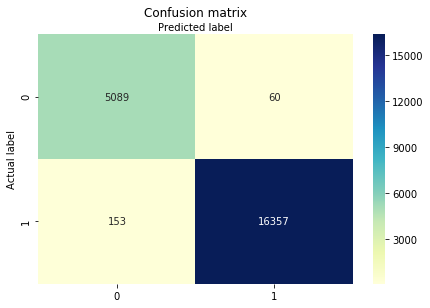

In [0]:

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_mlp)
#cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 5087    62]
 [  193 16317]]
Normalized confusion matrix
[[0.98795883 0.01204117]
 [0.01168988 0.98831012]]


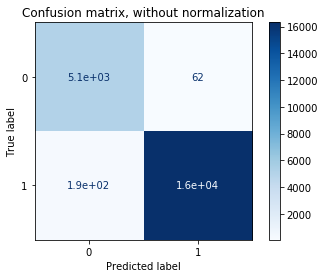

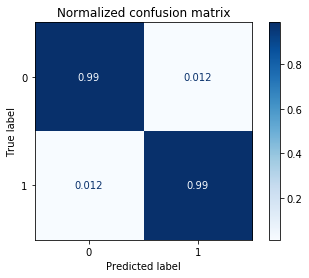

In [21]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(mlp, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_mlp))
print("Precision:",metrics.precision_score(y_test, y_pred_mlp))
print("Recall:",metrics.recall_score(y_test, y_pred_mlp))

Accuracy: 0.9901657509580313
Precision: 0.9963452518730584
Recall: 0.990732889158086


### ROC curve for MLP

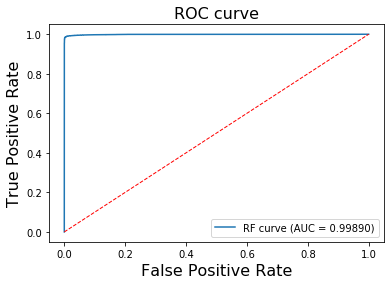

In [0]:
y_pred_proba_mlp= mlp.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_mlp)
auc = metrics.roc_auc_score(y_test, y_pred_proba_mlp)
plt.plot(fpr,tpr,label='{} curve (AUC = {:0.5f})'.format('RF',auc))
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc=4)
plt.show()

### Precision-Recall curve for MLP

Text(0.5, 1.0, '2-class PR-curve: Avg=1.00')

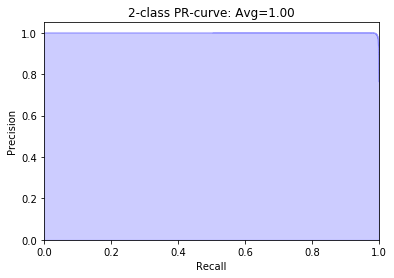

In [0]:
average_precision = average_precision_score(y_test, y_pred_proba_mlp)
#print('Average precision-recall score LR: {}'.format(average_precision))

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_mlp)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class PR-curve: Avg={0:0.2f}'.format(
          average_precision))

### Cross validation for mlp

In [0]:
#print(metrics.confusion_matrix(y_test,y_pred_mlp))  
#print(metrics.classification_report(y_test,y_pred_mlp))
#cross valiation
scores = cross_val_score(mlp, X, y, scoring='accuracy', cv=4)
print (scores)

[0.94080983 0.98637917 0.97118848 0.93240373]


In [0]:
np.mean(scores)

## Neural networks using KERAS

In [0]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import pandas as pd
%matplotlib inline
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.metrics import recall_score

Using TensorFlow backend.


In [0]:
from keras.layers import AlphaDropout
from keras.layers import Dropout

In [0]:
# Define a classifier
classifier = Sequential()
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim= 18))
# Adding the second hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
# classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['categorical_accuracy'])
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['sparse_categorical_accuracy', 'categorical_accuracy','binary_accuracy', 'accuracy'])
# Fitting the ANN to the training set 
#history1 = classifier.fit(X_train, y_train, validation_split=0.2, batch_size = 10, epochs = 100, verbose = 0)
history1 = classifier.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size = 10, epochs = 100, verbose = True)


In [0]:
# ACCURACY
y_pred_ann1 = classifier.predict_classes(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ann1))
print("Precision:",metrics.precision_score(y_test, y_pred_ann1))
print("Recall:",metrics.recall_score(y_test, y_pred_ann1))

Accuracy: 0.9839327762131216
Precision: 0.9854036520903412
Recall: 0.9936402180496668


### Validation plots

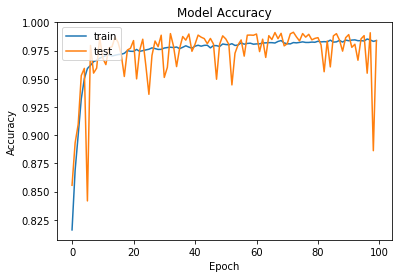

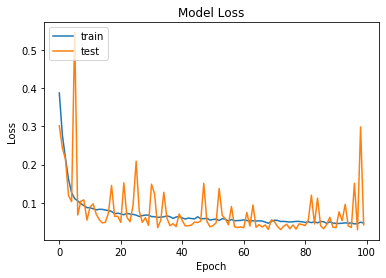

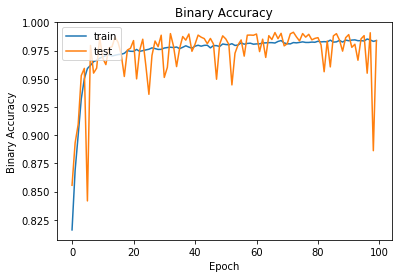

In [0]:
# Model validation
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history1.history['binary_accuracy'])
plt.plot(history1.history['val_binary_accuracy'])
plt.title('Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 152       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


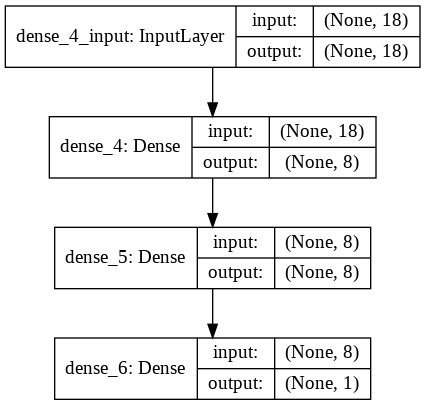

In [0]:
from keras.utils import plot_model
plot_model(classifier, to_file='/tmp/model.png', show_shapes=True,)

### Predictions

In [0]:
# Making predictions
y_pred_l2 = classifier.predict_classes(X_test)
from sklearn.metrics import recall_score


### Confusion matrix for keras-ann

Text(0.5, 257.44, 'Predicted label')

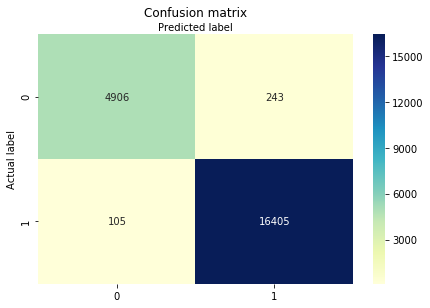

In [0]:

from sklearn.metrics import recall_score
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_l2)
#cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Roc curve for keras-ANN

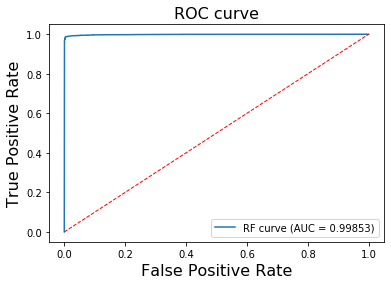

In [0]:
y_pred_keras_prob = classifier.predict_proba(X_test).ravel()
fpr, tpr, thresholds_keras = roc_curve(y_test, y_pred_keras_prob)
auc = metrics.roc_auc_score(y_test, y_pred_keras_prob)
plt.plot(fpr,tpr,label='{} curve (AUC = {:0.5f})'.format('RF',auc))
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc=4)
plt.show()

### Precision recall curve

Text(0.5, 1.0, '2-class PR-curve: Avg=1.00')

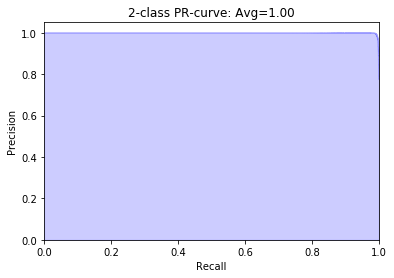

In [0]:
average_precision = average_precision_score(y_test, y_pred_keras_prob)
precision, recall, _ = precision_recall_curve(y_test, y_pred_keras_prob)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class PR-curve: Avg={0:0.2f}'.format(
     average_precision))

## Keras regulizer model
The regulizer function is not needed here sincethe first model was already good

### selu activation

In [0]:
from keras.layers import AlphaDropout
 #Define a classifier
classifierselu = Sequential()
classifierselu.add(Dense(units = 8, kernel_initializer='lecun_normal', activation = 'selu', input_dim= 18))
classifierselu.add(AlphaDropout(0.1))
# Adding the second hidden layer
classifierselu.add(Dense(units = 8, kernel_initializer='lecun_normal', activation = 'selu'))
classifierselu.add(AlphaDropout(0.1))
# Adding the output layer
classifierselu.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
# classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['categorical_accuracy'])
classifierselu.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['sparse_categorical_accuracy','binary_accuracy', 'accuracy'])

historyselu = classifierselu.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size = 10, epochs = 100, verbose = 1)
# Model validation
plt.plot(historyselu.history['acc'])
plt.plot(historyselu.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(historyselu.history['loss'])
plt.plot(historybal.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(historyselu.history['binary_accuracy'])
plt.plot(historyselu.history['val_binary_accuracy'])
plt.title('Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###  Balanced data using class weight

In [0]:
len(y_train[y_train['churn']==1])/len(y_train)

0.759596146150768

In [0]:
class_weight = {0: len(y_train[y_train['churn']==1])/len(y_train), 1: len(y_train[y_train['churn']==0])/len(y_train)}

In [0]:
class_weight

{0: churn    0.759596
 dtype: float64, 1: churn    0.0
 dtype: float64}

class weight auto

Train on 64974 samples, validate on 21659 samples
Epoch 1/100
64974/64974 [==============================] - 27s 411us/step - loss: 0.3945 - sparse_categorical_accuracy: 0.2404 - categorical_accuracy: 1.0000 - binary_accuracy: 0.8010 - acc: 0.8010 - val_loss: 0.3029 - val_sparse_categorical_accuracy: 0.2377 - val_categorical_accuracy: 1.0000 - val_binary_accuracy: 0.8465 - val_acc: 0.8465
Epoch 2/100
64974/64974 [==============================] - 26s 404us/step - loss: 0.2743 - sparse_categorical_accuracy: 0.2404 - categorical_accuracy: 1.0000 - binary_accuracy: 0.8670 - acc: 0.8670 - val_loss: 0.2386 - val_sparse_categorical_accuracy: 0.2377 - val_categorical_accuracy: 1.0000 - val_binary_accuracy: 0.8843 - val_acc: 0.8843
Epoch 3/100
64974/64974 [==============================] - 26s 406us/step - loss: 0.2302 - sparse_categorical_accuracy: 0.2404 - categorical_accuracy: 1.0000 - binary_accuracy: 0.8906 - acc: 0.8906 - val_loss: 0.2192 - val_sparse_categorical_accuracy: 0.2377 - val_c

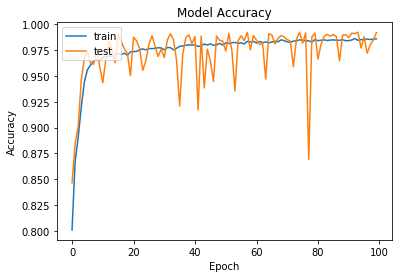

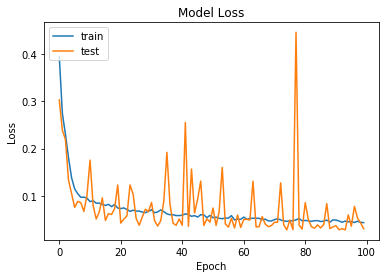

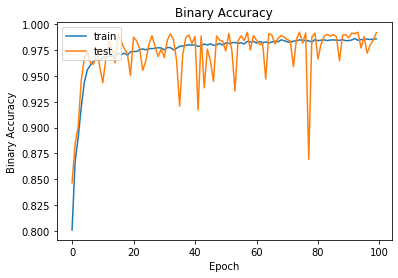

In [0]:
from sklearn.utils import class_weight
#class_weights = class_weight.compute_class_weight('balanced',
 #                                                np.unique(X_train),
  #                                               y_train)
# Define a classifier
classifier_bal = Sequential()
classifier_bal.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim= 18))
# Adding the second hidden layer
classifier_bal.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier_bal.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
# classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['categorical_accuracy'])
classifier_bal.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['sparse_categorical_accuracy', 'categorical_accuracy','binary_accuracy', 'accuracy'])
# Fitting the ANN to the training set 
#Define the class weights as mentioned in the rules of thumb.
class_weight = {0: len(y_train[y_train['churn']==1])/len(y_train), 1: len(y_train[y_train['churn']==0])/len(y_train)}
#history1 = classifier.fit(X_train, y_train, validation_split=0.2, batch_size = 10, epochs = 100, verbose = 0)
historybal= classifier_bal.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size = 10, epochs = 100, class_weight = 'auto',verbose = True)
# Model validation
plt.plot(historybal.history['acc'])
plt.plot(historybal.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(historybal.history['loss'])
plt.plot(historybal.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(historybal.history['binary_accuracy'])
plt.plot(historybal.history['val_binary_accuracy'])
plt.title('Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



class wight fixed

In [0]:
from sklearn.utils import class_weight
#class_weights = class_weight.compute_class_weight('balanced',
 #                                                np.unique(X_train),
  #                                               y_train)
# Define a classifier
classifier_bal = Sequential()
classifier_bal.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim= 18))
# Adding the second hidden layer
classifier_bal.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier_bal.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
# classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['categorical_accuracy'])
classifier_bal.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['sparse_categorical_accuracy', 'categorical_accuracy','binary_accuracy', 'accuracy'])
# Fitting the ANN to the training set 
#Define the class weights as mentioned in the rules of thumb.
class_weights = {0: len(y_train[y_train['churn']==1])/len(y_train), 1: len(y_train[y_train['churn']==0])/len(y_train)}
#history1 = classifier.fit(X_train, y_train, validation_split=0.2, batch_size = 10, epochs = 100, verbose = 0)
historybal= classifier_bal.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size = 10, epochs = 100, class_weight = class_weights,verbose = True)



Train on 64974 samples, validate on 21659 samples
Epoch 1/100
64974/64974 [==============================] - 38s 585us/step - loss: 0.1620 - sparse_categorical_accuracy: 0.2404 - categorical_accuracy: 1.0000 - binary_accuracy: 0.7328 - acc: 0.7328 - val_loss: 0.3697 - val_sparse_categorical_accuracy: 0.2377 - val_categorical_accuracy: 1.0000 - val_binary_accuracy: 0.7618 - val_acc: 0.7618
Epoch 2/100
64974/64974 [==============================] - 37s 576us/step - loss: 0.1191 - sparse_categorical_accuracy: 0.2404 - categorical_accuracy: 1.0000 - binary_accuracy: 0.7697 - acc: 0.7697 - val_loss: 0.3167 - val_sparse_categorical_accuracy: 0.2377 - val_categorical_accuracy: 1.0000 - val_binary_accuracy: 0.8149 - val_acc: 0.8149
Epoch 3/100
64974/64974 [==============================] - 38s 577us/step - loss: 0.1020 - sparse_categorical_accuracy: 0.2404 - categorical_accuracy: 1.0000 - binary_accuracy: 0.8367 - acc: 0.8367 - val_loss: 0.2640 - val_sparse_categorical_accuracy: 0.2377 - val_c

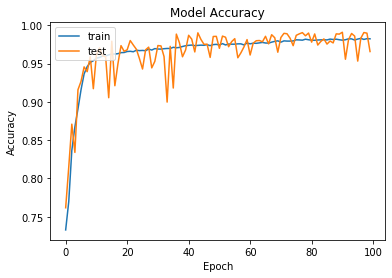

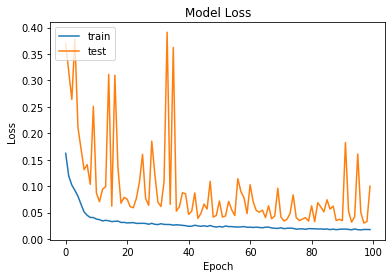

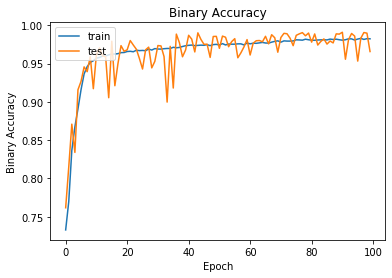

In [0]:
# Model validation
plt.plot(historybal.history['acc'])
plt.plot(historybal.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(historybal.history['loss'])
plt.plot(historybal.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(historybal.history['binary_accuracy'])
plt.plot(historybal.history['val_binary_accuracy'])
plt.title('Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Text(0.5, 257.44, 'Predicted label')

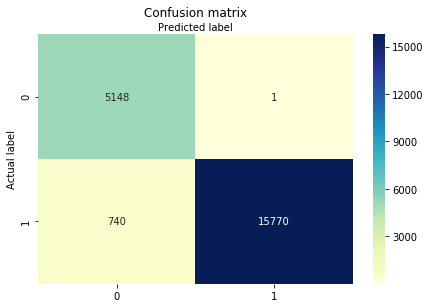

In [0]:
y_pred_lbal = classifier_bal.predict_classes(X_test)
from sklearn.metrics import recall_score
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_lbal)
#cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### DROPOUT +classweight

In [0]:
from sklearn.utils import class_weight
#class_weights = class_weight.compute_class_weight('balanced',
 #                                                np.unique(X_train),
  #                                               y_train)
# Define a classifier
classifier_balout = Sequential()
classifier_balout.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim= 18))
classifier_balout.add(Dropout(rate=0.5))
# Adding the second hidden layer
classifier_balout.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier_balout.add(Dropout(rate=0.5))
# Adding the output layer
classifier_balout.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
# classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['categorical_accuracy'])
classifier_balout.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['sparse_categorical_accuracy', 'categorical_accuracy','binary_accuracy', 'accuracy'])
# Fitting the ANN to the training set 
#Define the class weights as mentioned in the rules of thumb.
class_weights = {0: len(y_train[y_train['churn']==1])/len(y_train), 1: len(y_train[y_train['churn']==0])/len(y_train)}
#history1 = classifier.fit(X_train, y_train, validation_split=0.2, batch_size = 10, epochs = 100, verbose = 0)
historybal= classifier_balout.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size = 10, epochs = 100, class_weight = class_weights,verbose = True)


Train on 64974 samples, validate on 21659 samples
Epoch 1/100
64974/64974 [==============================] - 30s 469us/step - loss: 0.2126 - sparse_categorical_accuracy: 0.2404 - categorical_accuracy: 1.0000 - binary_accuracy: 0.6614 - acc: 0.6614 - val_loss: 0.4187 - val_sparse_categorical_accuracy: 0.2377 - val_categorical_accuracy: 1.0000 - val_binary_accuracy: 0.7697 - val_acc: 0.7697
Epoch 2/100
64974/64974 [==============================] - 30s 460us/step - loss: 0.1879 - sparse_categorical_accuracy: 0.2404 - categorical_accuracy: 1.0000 - binary_accuracy: 0.6788 - acc: 0.6788 - val_loss: 0.3980 - val_sparse_categorical_accuracy: 0.2377 - val_categorical_accuracy: 1.0000 - val_binary_accuracy: 0.7591 - val_acc: 0.7591
Epoch 3/100
64974/64974 [==============================] - 29s 453us/step - loss: 0.1799 - sparse_categorical_accuracy: 0.2404 - categorical_accuracy: 1.0000 - binary_accuracy: 0.6836 - acc: 0.6836 - val_loss: 0.3976 - val_sparse_categorical_accuracy: 0.2377 - val_c

In [0]:
classifier_bal.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 8)                 152       
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 9         
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


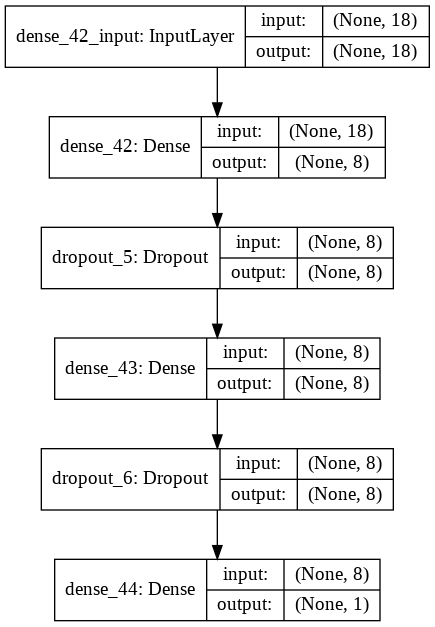

In [0]:
from keras.utils import plot_model
plot_model(classifier_balout, to_file='/tmp/model.png', show_shapes=True,)

In [0]:
classifier_balout.get_config()

{'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 18),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'RandomUniform',
     'config': {'maxval': 0.05, 'minval': -0.05, 'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_42',
    'trainable': True,
    'units': 8,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_5',
    'noise_shape': None,
    'rate': 0.5,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint':

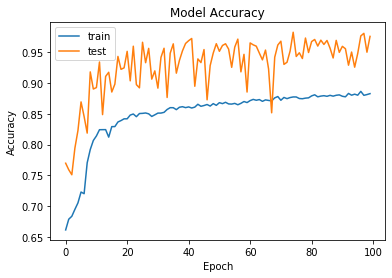

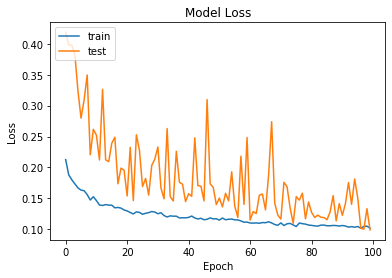

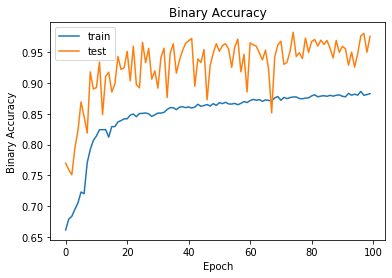

In [0]:
# Model validation
plt.plot(historybal.history['acc'])
plt.plot(historybal.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(historybal.history['loss'])
plt.plot(historybal.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(historybal.history['binary_accuracy'])
plt.plot(historybal.history['val_binary_accuracy'])
plt.title('Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### L2 regulizer

In [0]:
from keras import regularizers
classifier_l2 = Sequential()
classifier_l2.add(Dense(units = 8, kernel_initializer = 'uniform', kernel_regularizer = regularizers.l2(0.001), activation = 'relu', input_dim= 18))
# Adding the second hidden layer
classifier_l2.add(Dense(units = 8, kernel_initializer = 'uniform', kernel_regularizer = regularizers.l2(0.001), activation = 'relu'))
# Adding the output layer
classifier_l2.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN

classifier_l2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['sparse_categorical_accuracy', 'categorical_accuracy','binary_accuracy', 'accuracy'])
#es = EarlyStopping(monitor='val_acc', mode='auto', verbose=0, patience=50)
history_l2 = classifier_l2.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size = 10, epochs = 100, verbose = True)

Train on 64974 samples, validate on 21659 samples
Epoch 1/100
64974/64974 [==============================] - 26s 402us/step - loss: 0.4229 - sparse_categorical_accuracy: 0.2404 - categorical_accuracy: 1.0000 - binary_accuracy: 0.7593 - acc: 0.7593 - val_loss: 0.3927 - val_sparse_categorical_accuracy: 0.2377 - val_categorical_accuracy: 1.0000 - val_binary_accuracy: 0.7513 - val_acc: 0.7513
Epoch 2/100
64974/64974 [==============================] - 26s 397us/step - loss: 0.3776 - sparse_categorical_accuracy: 0.2404 - categorical_accuracy: 1.0000 - binary_accuracy: 0.7575 - acc: 0.7575 - val_loss: 0.3607 - val_sparse_categorical_accuracy: 0.2377 - val_categorical_accuracy: 1.0000 - val_binary_accuracy: 0.7623 - val_acc: 0.7623
Epoch 3/100
64974/64974 [==============================] - 26s 395us/step - loss: 0.3647 - sparse_categorical_accuracy: 0.2404 - categorical_accuracy: 1.0000 - binary_accuracy: 0.7596 - acc: 0.7596 - val_loss: 0.3543 - val_sparse_categorical_accuracy: 0.2377 - val_c

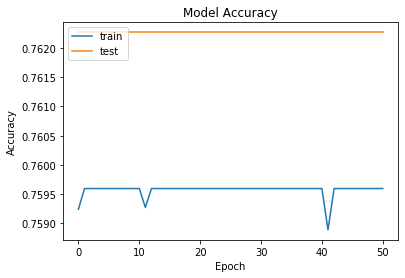

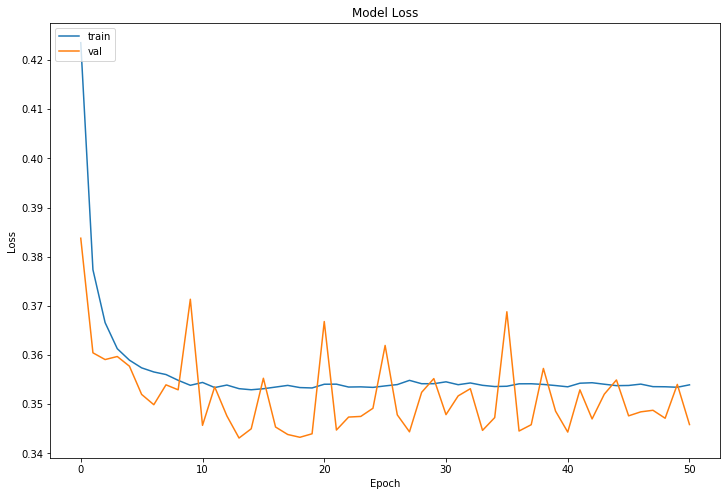

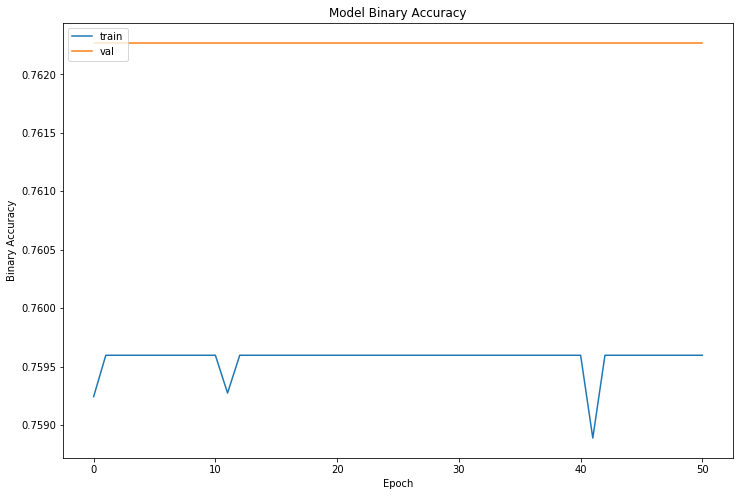

In [0]:
# plot 
# plt.figure(figsize=(12,8))
plt.plot(history_l2.history['acc'])
plt.plot(history_l2.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.figure(figsize=(12,8))
plt.plot(history_l2.history['loss'])
plt.plot(history_l2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.figure(figsize=(12,8))
plt.plot(history_l2.history['binary_accuracy'])
plt.plot(history_l2.history['val_binary_accuracy'])
plt.title('Model Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Predictions

In [0]:
# Making predictions
y_pred_reg = classifier_l2.predict_classes(X_test)
from sklearn.metrics import recall_score


### Accuracy

In [0]:
# ACCURACY
y_pred_reg = classifier_l2.predict_classes(X_test)
from sklearn.metrics import recall_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_reg))
print("Precision:",metrics.precision_score(y_test, y_pred_reg))
print("Recall:",metrics.recall_score(y_test, y_pred_reg))

Accuracy: 0.762269726210813
Precision: 0.762269726210813
Recall: 1.0


### Oversampling data

In [0]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=212)
x_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % len(y_train_resampled))

Resampled dataset shape 98708


Train on 64974 samples, validate on 21659 samples
Epoch 1/100
64974/64974 [==============================] - 29s 442us/step - loss: 0.4592 - sparse_categorical_accuracy: 0.2404 - categorical_accuracy: 1.0000 - binary_accuracy: 0.7595 - acc: 0.7595 - val_loss: 0.3834 - val_sparse_categorical_accuracy: 0.2377 - val_categorical_accuracy: 1.0000 - val_binary_accuracy: 0.7623 - val_acc: 0.7623
Epoch 2/100
64974/64974 [==============================] - 28s 426us/step - loss: 0.4061 - sparse_categorical_accuracy: 0.2404 - categorical_accuracy: 1.0000 - binary_accuracy: 0.7596 - acc: 0.7596 - val_loss: 0.3629 - val_sparse_categorical_accuracy: 0.2377 - val_categorical_accuracy: 1.0000 - val_binary_accuracy: 0.7623 - val_acc: 0.7623
Epoch 3/100
64974/64974 [==============================] - 28s 432us/step - loss: 0.3886 - sparse_categorical_accuracy: 0.2404 - categorical_accuracy: 1.0000 - binary_accuracy: 0.7596 - acc: 0.7596 - val_loss: 0.3401 - val_sparse_categorical_accuracy: 0.2377 - val_c

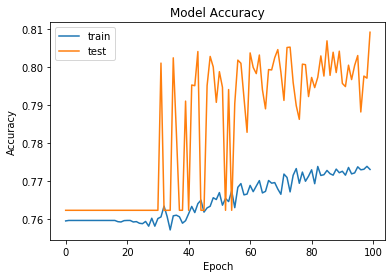

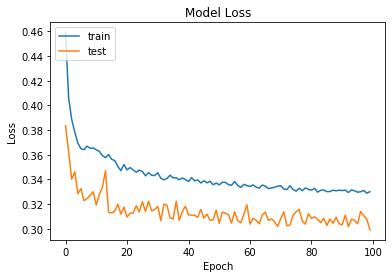

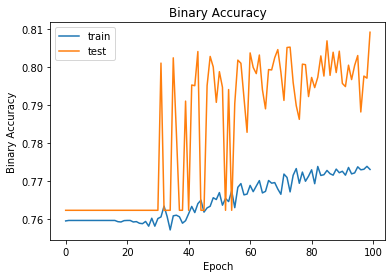

In [0]:
# Define a classifier
classifiersample = Sequential()
classifiersample.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim= 18))
classifiersample.add(Dropout(rate=0.5))
# Adding the second hidden layer
classifiersample.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifiersample.add(Dropout(rate=0.5))
# Adding the output layer
classifiersample.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
# classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['categorical_accuracy'])
classifiersample.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['sparse_categorical_accuracy', 'categorical_accuracy','binary_accuracy', 'accuracy'])
# Fitting the ANN to the training set 
#history1 = classifier.fit(X_train, y_train, validation_split=0.2, batch_size = 10, epochs = 100, verbose = 0)
historysample = classifiersample.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size = 10, epochs = 100, verbose = True)
# Model validation
plt.plot(historysample.history['acc'])
plt.plot(historysample.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(historysample.history['loss'])
plt.plot(historysample.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(historysample.history['binary_accuracy'])
plt.plot(historysample.history['val_binary_accuracy'])
plt.title('Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Text(0.5, 257.44, 'Predicted label')

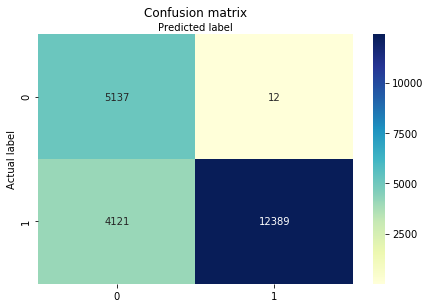

In [0]:
# Making predictions
y_pred_sam = classifiersample.predict_classes(X_test)
from sklearn.metrics import recall_score
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_sam)
#cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### TUNING ANN

In [0]:
# Tuning the ANN, takes time to run
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', kernel_regularizer = regularizers.l2(0.001), activation = 'relu', input_dim= 18))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', kernel_regularizer = regularizers.l2(0.001), activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier_grid = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [6, 10, 15, 25],
              'epochs': [100, 200, 300, 400, 500],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier_grid,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/100
43316/43316 [==============================] - 25s 582us/step - loss: 0.4315 - acc: 0.7609
Epoch 2/100
43316/43316 [==============================] - 24s 565us/step - loss: 0.3857 - acc: 0.7609
Epoch 3/100
43316/43316 [==============================] - 24s 548us/step - loss: 0.3711 - acc: 0.7609
Epoch 4/100
43316/43316 [==============================] - 24s 556us/step - loss: 0.3654 - acc: 0.7609
Epoch 5/100
43316/43316 [==============================] - 24s 543us/step - loss: 0.3620 - acc: 0.7609
Epoch 6/100
43316/43316 [==============================] - 23s 536us/step - loss: 0.3620 - acc: 0.7609
Epoch 7/100
43316/43316 [==============================] - 23s 534us/step - loss: 0.3583 - acc: 0.7609
Epoch 8/100
43316/43316 [==============================] - 23s 534us/step - loss: 0.3574 - acc: 0.7609
Epoch 9/100
43316/43316 [==============================] - 24s 543us/step - loss: 0.3553 - acc: 0.7609
Epoch 10/100
43316/43316 [==============================] - 23s 532us/ste

In [0]:
2+2

4

# Comparaison curves
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Feature explanation

In [0]:
!pip install lime

     |████████████████████████████████| 276kB 8.6MB/s 
  Created wheel for lime: filename=lime-0.1.1.36-cp36-none-any.whl size=284191 sha256=4e81f57107f1c03d790d0af0531dd264b6878568266ac564d834c7199719d6a6
  Stored in directory: /root/.cache/pip/wheels/a9/2f/25/4b2127822af5761dab9a27be52e175105772aebbcbc484fb95
Successfully built lime


In [0]:
import lime
import lime.lime_tabular
from __future__ import print_function


LLime for ANN

In [0]:
#y_pred_keras_prob = classifier.predict_proba(X_test).ravel()
X_explain = X_test
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train.values,
                                                   feature_names=X_train.columns.values,
                                                   discretize_continuous=True,
                                                   class_names=['No', 'Yes'],
                                                   mode="classification",
                                                   verbose=True,
                                                   random_state=0)

#Explaining first subject in test set using all 30 features
exp = explainer.explain_instance(X_explain.values[0,:],classifier.predict_proba, 
                                 num_features=20)
#Plot local explanation
plt = exp.as_pyplot_figure()
plt.tight_layout()
exp.show_in_notebook(show_table=True)

## Lime for Lightgbm

In [0]:
from lightgbm import LGBMClassifier
lgbm_c = LGBMClassifier(boosting_type='gbdt',objective='binary',learning_rate=0.1, num_iterations=20, subsample_freq=1)
# fit the model with data
lgbm_c.fit(X_train,y_train)
y_pred_lgbm=lgbm_c.predict(X_test)

In [0]:
from scipy.special import expit
#plt.plot(lgbm_c.loss_curve_)
#plt.show()

Text(0.5, 257.44, 'Predicted label')

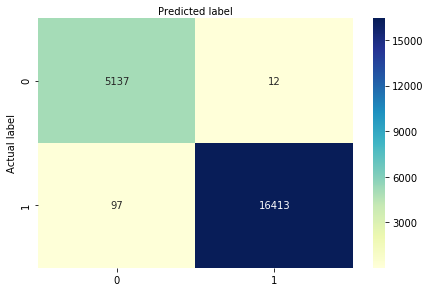

In [28]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_lgbm)
#cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
#plt.title('Confusion matrix - LightGBM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 5137    12]
 [   97 16413]]
Normalized confusion matrix
[[0.99766945 0.00233055]
 [0.00587523 0.99412477]]


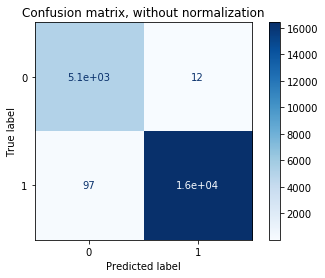

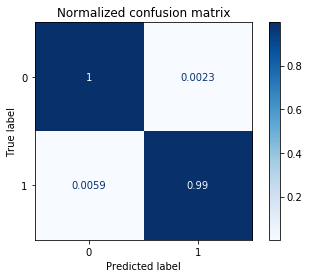

In [29]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(lgbm_c, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

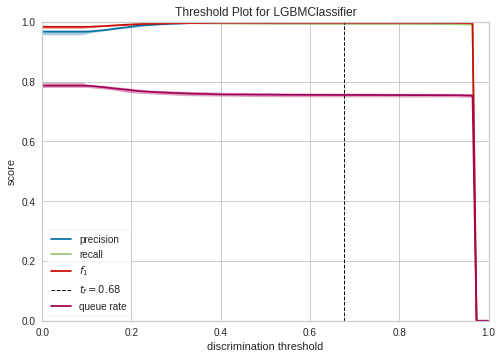

In [0]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(lgbm_c)
visualizer.fit(X_train,y_train)
visualizer.poof()

Accuracy: 0.9949674500207766
Precision: 0.999269406392694
Recall: 0.9941247728649304


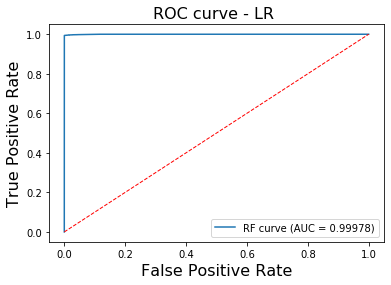

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lgbm))
print("Precision:",metrics.precision_score(y_test, y_pred_lgbm))
print("Recall:",metrics.recall_score(y_test, y_pred_lgbm))
y_pred_lgbmc = lgbm_c.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_lgbmc)
auc = metrics.roc_auc_score(y_test, y_pred_lgbmc)
plt.plot(fpr,tpr,label='{} curve (AUC = {:0.5f})'.format('RF',auc))
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve - LR ', fontsize=16)
plt.legend(loc=4)
plt.show()

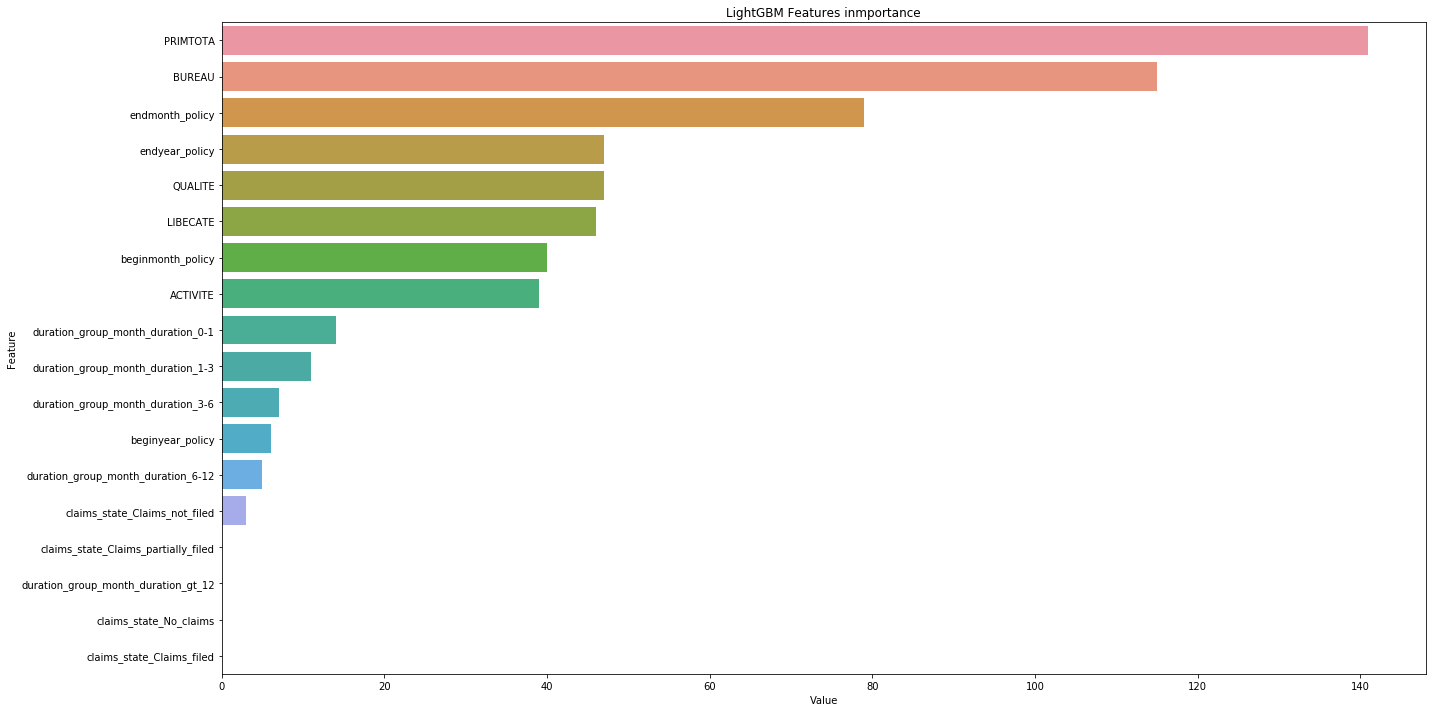

<Figure size 432x288 with 0 Axes>

In [0]:
feature_imp = pd.DataFrame(sorted(zip(lgbm_c.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features inmportance')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [0]:
# Usefull function for plot
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=True)
  enable_plotly_in_cell()
insurance_churn_prediction(lgbm_c,X_train,X_test,y_train,y_test,
                         feature_cols,"features",threshold_plot = True)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_iterations=20, num_leaves=31,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=1)
Area under curve :  0.9958971116218225 



Intercept 0.7465248787520162
Prediction_local [1.05051653]
Right: 0.9678655013307073


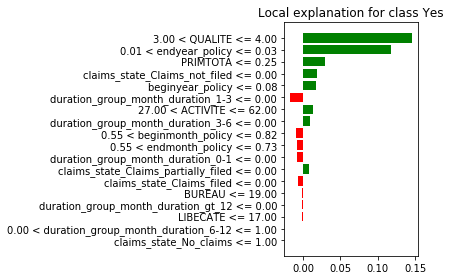

In [0]:
#Explain samples in test set
X_explain = X_test
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train.values,
                                                   feature_names=X_train.columns.values,
                                                   discretize_continuous=True,
                                                   class_names=['No', 'Yes'],
                                                   mode="classification",
                                                   verbose=True,
                                                   random_state=0)

#Explaining first subject in test set using all 30 features
exp = explainer.explain_instance(X_explain.values[0,:],lgbm_c.predict_proba, 
                                 num_features=20)
#Plot local explanation

plt = exp.as_pyplot_figure()
plt.tight_layout()
exp.show_in_notebook(show_table=True)

In [0]:
2+2

4

In [0]:
# Average precision
 #Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# split data into X and y
#X = bankAddFull_df.iloc[:,0:20]
#Y = bankAddFull_df['y']
# prepare models
models = []
models.append(( ' LR ', LogisticRegression(penalty='l2',C=25)))
models.append(( ' LGBM ' ,  LGBMClassifier(boosting_type='gbdt',objective='binary',
                                           learning_rate=0.1, num_iterations=20, subsample_freq=1)))
models.append(( ' MLP' ,  MLPClassifier(solver='adam', activation='relu',  alpha=0.001, 
                                            max_iter=500, random_state=5,  hidden_layer_sizes=(10,), early_stopping=False )))
# evaluate each model in turn
#mlp= MLPClassifier(solver='adam', activation='relu', alpha=0.001, max_iter=500, random_state=5, 
 #                  hidden_layer_sizes=(10,), early_stopping=False )
#mlp.fit(X_train,y_train)
#y_pred_mlp = mlp.predict(X_test)
results = []
names = []
scoring = 'average_precision_score'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle( ' Algorithms Comparison(loss)' )
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [0]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

# Model Comparaison

 LR : -0.834435 (0.115460)
 LGBM : -0.183392 (0.028183)
 MLP: -0.353632 (0.065594)


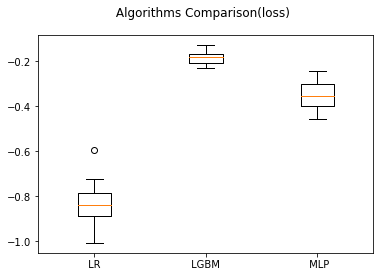

In [0]:
#Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, log_loss

# split data into X and y
#X = bankAddFull_df.iloc[:,0:20]
#Y = bankAddFull_df['y']
# prepare models
models = []
models.append(( ' LR ', LogisticRegression(penalty='l2',C=25)))
models.append(( ' LGBM ' ,  LGBMClassifier(boosting_type='gbdt',objective='binary',
                                           learning_rate=0.1, num_iterations=20, subsample_freq=1)))
models.append(( ' MLP' ,  MLPClassifier(solver='adam', activation='relu',  alpha=0.001, 
                                            max_iter=500, random_state=5,  hidden_layer_sizes=(10,), early_stopping=False )))
# evaluate each model in turn
#mlp= MLPClassifier(solver='adam', activation='relu', alpha=0.001, max_iter=500, random_state=5, 
 #                  hidden_layer_sizes=(10,), early_stopping=False )
#mlp.fit(X_train,y_train)
#y_pred_mlp = mlp.predict(X_test)
results = []
names = []
#scoring = 'neg_log_loss'
args_loss = { "labels": [0,1] }
 #make_scorer(log_loss, greater_is_better=False,**args_loss)
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=make_scorer(log_loss, greater_is_better=False))
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle( ' Algorithms Comparison(loss)' )
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

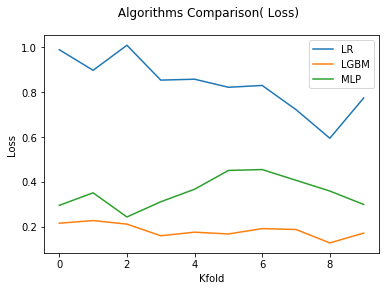

In [0]:
fig = pyplot.figure()
fig.suptitle( ' Algorithms Comparison( Loss)' )
#ax = fig.add_subplot(111)
plt.ylabel('Loss')
plt.xlabel('Kfold')
pyplot.plot(abs(results[0]), label = "LR") #LR
pyplot.plot(abs(results[1]), label= 'LGBM') #LGBM
pyplot.plot(abs(results[2]), label='MLP') #MLP
plt.legend()
pyplot.show()

No handles with labels found to put in legend.


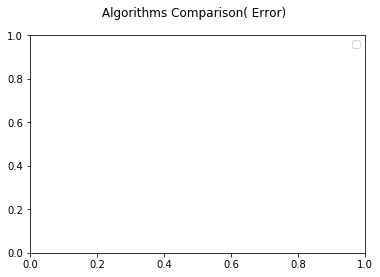

In [0]:
fig = pyplot.figure()
fig.suptitle( ' Algorithms Comparison( Error)' )
#ax = fig.add_subplot(111)
#plt.ylabel('Loss')
#plt.xlabel('Kfold')
a=abs(results[0])
b=abs(results[1])
c=abs(results[2])
dat= {'LR':a, 'LGBM':b, 'MLP':c}
df = pd.DataFrame(dat) 
plt.legend()
pyplot.show()

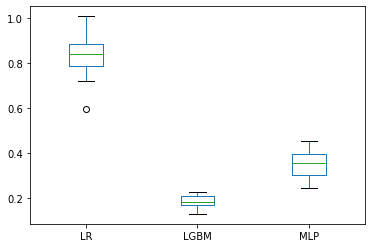

In [0]:
df.plot(kind='box')

 LR : -0.088136 (0.007701)
 LGBM : -0.059794 (0.000849)
 MLP: -0.035700 (0.003440)


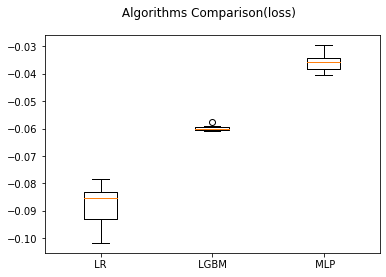

In [0]:
 #Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# split data into X and y
#X = bankAddFull_df.iloc[:,0:20]
#Y = bankAddFull_df['y']
# prepare models
models = []
models.append(( ' LR ', LogisticRegression(penalty='l2',C=25)))
models.append(( ' LGBM ' ,  LGBMClassifier(boosting_type='gbdt',objective='binary',
                                           learning_rate=0.1, num_iterations=20, subsample_freq=1)))
models.append(( ' MLP' ,  MLPClassifier(solver='adam', activation='relu',  alpha=0.001, 
                                            max_iter=500, random_state=5,  hidden_layer_sizes=(10,), early_stopping=False )))
# evaluate each model in turn
#mlp= MLPClassifier(solver='adam', activation='relu', alpha=0.001, max_iter=500, random_state=5, 
 #                  hidden_layer_sizes=(10,), early_stopping=False )
#mlp.fit(X_train,y_train)
#y_pred_mlp = mlp.predict(X_test)
results = []
names = []
scoring = 'neg_log_loss'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle( ' Algorithms Comparison(loss)' )
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

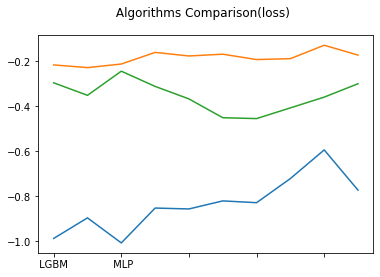

In [0]:
fig = pyplot.figure()
fig.suptitle( ' Algorithms Comparison(loss)' )
ax = fig.add_subplot(111)

pyplot.plot(results[0])
pyplot.plot(results[1])
pyplot.plot(results[2])
pyplot.show()

In [0]:
r = [array([0.10173152, 0.09143171, 0.09942329, 0.09348387, 0.08520112,
        0.08467942, 0.08257001, 0.07836392, 0.07871544, 0.0857636 ]),
 array([0.06006711, 0.06062734, 0.06081165, 0.05995933, 0.06002056,
        0.05923104, 0.059411  , 0.06055966, 0.05774677, 0.05950235]),
 array([0.03490422, 0.03953695, 0.0338966 , 0.02961222, 0.03598748,
        0.04043267, 0.03544667, 0.03826888, 0.03835397, 0.0305567 ])]

In [0]:
lr=[0.10173152, 0.09143171, 0.09942329, 0.09348387, 0.08520112,
        0.08467942, 0.08257001, 0.07836392, 0.07871544, 0.0857636 ]
lg =[0.06006711, 0.06062734, 0.06081165, 0.05995933, 0.06002056,
        0.05923104, 0.059411  , 0.06055966, 0.05774677, 0.05950235]
ml = [0.03490422, 0.03953695, 0.0338966 , 0.02961222, 0.03598748,
        0.04043267, 0.03544667, 0.03826888, 0.03835397, 0.0305567 ]
dat= {'LR':lr, 'LGBM':lg, 'MLP':ml }
df = pd.DataFrame(dat) 


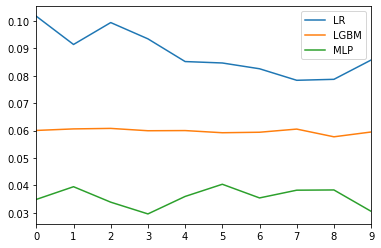

In [0]:
df.plot()

In [0]:
df

,LR,LGBM,MLP
0,0.101732,0.060067,0.034904
1,0.091432,0.060627,0.039537
2,0.099423,0.060812,0.033897
3,0.093484,0.059959,0.029612
4,0.085201,0.060021,0.035987
5,0.084679,0.059231,0.040433
6,0.082570,0.059411,0.035447
7,0.078364,0.060560,0.038269
8,0.078715,0.057747,0.038354
9,0.085764,0.059502,0.030557


Useful code for plotting the network  graph

In [0]:
from matplotlib import pyplot
from math import cos, sin, atan
from palettable.tableau import Tableau_10
from time import localtime, strftime
import numpy as np

class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius, id=-1):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)
        pyplot.gca().text(self.x, self.y-0.15, str(id), size=10, ha='center')

class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2, weight=0.4, textoverlaphandler=None):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)

        # assign colors to lines depending on the sign of the weight
        color=Tableau_10.mpl_colors[0]
        if weight > 0: color=Tableau_10.mpl_colors[1]

        # assign different linewidths to lines depending on the size of the weight
        abs_weight = abs(weight)        
        if abs_weight > 0.5: 
            linewidth = 10*abs_weight
        elif abs_weight > 0.8: 
            linewidth =  100*abs_weight
        else:
            linewidth = abs_weight

        # draw the weights and adjust the labels of weights to avoid overlapping
        if abs_weight > 0.5: 
            # while loop to determine the optimal locaton for text lables to avoid overlapping
            index_step = 2
            num_segments = 10   
            txt_x_pos = neuron1.x - x_adjustment+index_step*(neuron2.x-neuron1.x+2*x_adjustment)/num_segments
            txt_y_pos = neuron1.y - y_adjustment+index_step*(neuron2.y-neuron1.y+2*y_adjustment)/num_segments
            while ((not textoverlaphandler.getspace([txt_x_pos-0.5, txt_y_pos-0.5, txt_x_pos+0.5, txt_y_pos+0.5])) and index_step < num_segments):
                index_step = index_step + 1
                txt_x_pos = neuron1.x - x_adjustment+index_step*(neuron2.x-neuron1.x+2*x_adjustment)/num_segments
                txt_y_pos = neuron1.y - y_adjustment+index_step*(neuron2.y-neuron1.y+2*y_adjustment)/num_segments

            # print("Label positions: ", "{:.2f}".format(txt_x_pos), "{:.2f}".format(txt_y_pos), "{:3.2f}".format(weight))
            a=pyplot.gca().text(txt_x_pos, txt_y_pos, "{:3.2f}".format(weight), size=8, ha='center')
            a.set_bbox(dict(facecolor='white', alpha=0))
            # print(a.get_bbox_patch().get_height())

        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment), linewidth=linewidth, color=color)
        pyplot.gca().add_line(line)

    def draw(self, layerType=0, weights=None, textoverlaphandler=None):
        j=0 # index for neurons in this layer
        for neuron in self.neurons:            
            i=0 # index for neurons in previous layer
            neuron.draw( self.neuron_radius, id=j+1 )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron, weights[i,j], textoverlaphandler)
                    i=i+1
            j=j+1
        
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

# A class to handle Text Overlapping
# The idea is to first create a grid space, if a grid is already occupied, then
# the grid is not available for text labels.
class TextOverlappingHandler():
    # initialize the class with the width and height of the plot area
    def __init__(self, width, height, grid_size=0.2):
        self.grid_size = grid_size
        self.cells = np.ones((int(np.ceil(width / grid_size)), int(np.ceil(height / grid_size))), dtype=bool)

    # input test_coordinates(bottom left and top right), 
    # getspace will tell you whether a text label can be put in the test coordinates
    def getspace(self, test_coordinates):
        x_left_pos = int(np.floor(test_coordinates[0]/self.grid_size))
        y_botttom_pos = int(np.floor(test_coordinates[1]/self.grid_size))
        x_right_pos = int(np.floor(test_coordinates[2]/self.grid_size))
        y_top_pos = int(np.floor(test_coordinates[3]/self.grid_size))
        if self.cells[x_left_pos, y_botttom_pos] and self.cells[x_left_pos, y_top_pos] \
        and self.cells[x_right_pos, y_top_pos] and self.cells[x_right_pos, y_botttom_pos]:
            for i in range(x_left_pos, x_right_pos):
                for j in range(y_botttom_pos, y_top_pos):
                    self.cells[i, j] = False

            return True
        else:
            return False

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self, weights_list=None):
        # vertical_distance_between_layers and horizontal_distance_between_neurons are the same with the variables of the same name in layer class
        vertical_distance_between_layers = 6
        horizontal_distance_between_neurons = 2
        overlaphandler = TextOverlappingHandler(\
            self.number_of_neurons_in_widest_layer*horizontal_distance_between_neurons,\
            len(self.layers)*vertical_distance_between_layers, grid_size=0.2 )

        pyplot.figure(figsize=(12, 9))
        for i in range( len(self.layers) ):
            layer = self.layers[i]                                
            if i == 0:
                layer.draw( layerType=0 )
            elif i == len(self.layers)-1:
                layer.draw( layerType=-1, weights=weights_list[i-1], textoverlaphandler=overlaphandler)
            else:
                layer.draw( layerType=i, weights=weights_list[i-1], textoverlaphandler=overlaphandler)

        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'Neural Network architecture', fontsize=15 )
        figureName='ANN_'+strftime("%Y%m%d_%H%M%S", localtime())+'.png'
        pyplot.savefig(figureName, dpi=300, bbox_inches="tight")
        pyplot.show()

class DrawNN():
    # para: neural_network is an array of the number of neurons 
    # from input layer to output layer, e.g., a neural network of 5 nerons in the input layer, 
    # 10 neurons in the hidden layer 1 and 1 neuron in the output layer is [5, 10, 1]
    # para: weights_list (optional) is the output weights list of a neural network which can be obtained via classifier.coefs_
    def __init__( self, neural_network, weights_list=None ):
        self.neural_network = neural_network
        self.weights_list = weights_list
        # if weights_list is none, then create a uniform list to fill the weights_list
        if weights_list is None:
            weights_list=[]
            for first, second in zip(neural_network, neural_network[1:]):
                tempArr = np.ones((first, second))*0.4
                weights_list.append(tempArr)
            self.weights_list = weights_list
        
    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw(self.weights_list)